In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Carrega o dataset final
df = pd.read_csv("flights_with_origin_weather.csv")

# Visualiza o shape e primeiras linhas
print(df.shape)
df.head()


(413855, 34)


,year,month,day_of_month,day_of_week,flight_date,origin,origin_city_name,origin_state_nm,dep_time_raw,taxi_out,...,temperature_2m_min,precipitation_sum,wind_speed_10m_max,wind_gusts_10m_max,wind_direction_10m_dominant,shortwave_radiation_sum,uv_index_max,iata,date_str,source_file
0,2024,1,1,1,01/01/2024,JFK,"New York, NY",New York,1247.0,31.0,...,1.7,0.0,13.6,22.7,295,5.26,NaN,JFK,2024-01-01,weather_JFK.csv
1,2024,1,1,1,01/01/2024,MSP,"Minneapolis, MN",Minnesota,1001.0,20.0,...,-6.9,0.0,10.7,27.0,243,6.22,NaN,MSP,2024-01-01,weather_MSP.csv
2,2024,1,1,0,01/01/2024,JFK,"New York, NY",New York,1411.0,21.0,...,1.7,0.0,13.6,22.7,295,5.26,NaN,JFK,2024-01-01,weather_JFK.csv
3,2024,1,1,1,01/01/2024,JFK,"New York, NY",New York,1054.0,13.0,...,1.7,0.0,13.6,22.7,295,5.26,NaN,JFK,2024-01-01,weather_JFK.csv
4,2024,1,1,1,01/01/2024,ATL,"Atlanta, GA",Georgia,915.0,22.0,...,3.4,0.0,23.7,42.5,284,11.33,NaN,ATL,2024-01-01,weather_ATL.csv


In [3]:
# Informações básicas
df.info()

# Checar valores ausentes
df.isna().mean().sort_values(ascending=False).head(10)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413855 entries, 0 to 413854
Data columns (total 34 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   year                         413855 non-null  int64  
 1   month                        413855 non-null  int64  
 2   day_of_month                 413855 non-null  int64  
 3   day_of_week                  413855 non-null  int64  
 4   flight_date                  413855 non-null  object 
 5   origin                       413855 non-null  object 
 6   origin_city_name             413855 non-null  object 
 7   origin_state_nm              413855 non-null  object 
 8   dep_time_raw                 405429 non-null  float64
 9   taxi_out                     405237 non-null  float64
 10  wheels_off                   405237 non-null  float64
 11  wheels_on                    404919 non-null  float64
 12  taxi_in                      404919 non-null  float64
 13 

uv_index_max          1.000000
air_time              0.023859
taxi_in               0.021592
wheels_on             0.021592
wheels_off            0.020824
taxi_out              0.020824
dep_time_raw          0.020360
weather_code          0.000000
temperature_2m_max    0.000000
temperature_2m_min    0.000000
dtype: float64

1    0.706407
0    0.293593
Name: is_delayed, dtype: float64


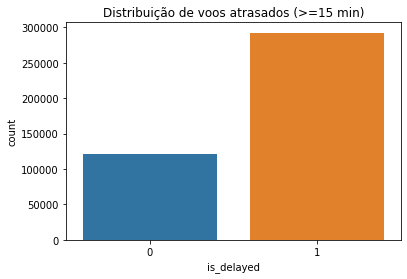

In [4]:
# Cria variável de atraso
df["dep_time_raw"] = pd.to_numeric(df["dep_time_raw"], errors="coerce")
df["wheels_off"] = pd.to_numeric(df["wheels_off"], errors="coerce")

df["delay_mins"] = df["wheels_off"] - df["dep_time_raw"]

# marca atraso >= 15 minutos como '1'
df["is_delayed"] = (df["delay_mins"] >= 15).astype(int)

# Distribuição de atrasos
print(df["is_delayed"].value_counts(normalize=True))
sns.countplot(x="is_delayed", data=df)
plt.title("Distribuição de voos atrasados (>=15 min)")
plt.show()


In [5]:
df.describe(include="all").T


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
year,413855.0,NaN,NaN,NaN,2024.0,0.0,2024.0,2024.0,2024.0,2024.0,2024.0
month,413855.0,NaN,NaN,NaN,1.477414,0.49949,1.0,1.0,1.0,2.0,2.0
day_of_month,413855.0,NaN,NaN,NaN,15.295446,8.585703,1.0,8.0,15.0,23.0,31.0
day_of_week,413855.0,NaN,NaN,NaN,3.893441,2.008568,0.0,2.0,4.0,6.0,7.0
flight_date,413855,60,2/23/2024,7575,NaN,NaN,NaN,NaN,NaN,NaN,NaN
origin,413855,20,ATL,50297,NaN,NaN,NaN,NaN,NaN,NaN,NaN
origin_city_name,413855,20,"Atlanta, GA",50297,NaN,NaN,NaN,NaN,NaN,NaN,NaN
origin_state_nm,413855,18,Georgia,50297,NaN,NaN,NaN,NaN,NaN,NaN,NaN
dep_time_raw,405429.0,NaN,NaN,NaN,1367.164122,506.669279,1.0,941.0,1347.0,1809.0,2400.0
taxi_out,405237.0,NaN,NaN,NaN,19.232387,10.369055,1.0,13.0,17.0,22.0,213.0


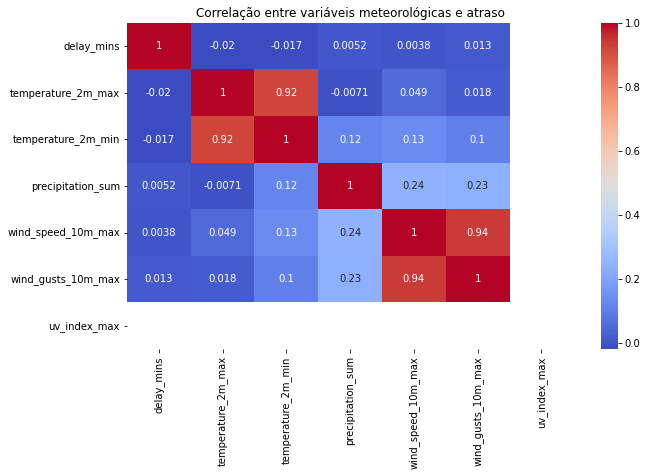

In [6]:
# Correlação entre variáveis meteorológicas e atraso
num_cols = [
    "delay_mins",
    "temperature_2m_max", "temperature_2m_min",
    "precipitation_sum", "wind_speed_10m_max", "wind_gusts_10m_max",
    "uv_index_max"
]
corr = df[num_cols].corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlação entre variáveis meteorológicas e atraso")
plt.show()


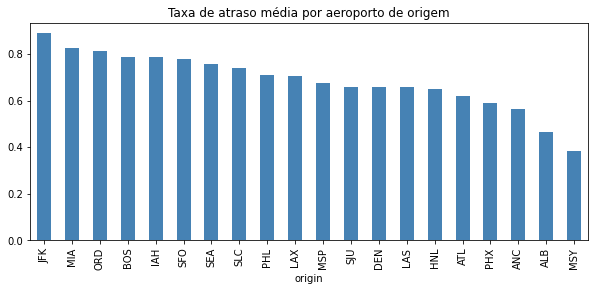

In [7]:
delay_by_airport = df.groupby("origin")["is_delayed"].mean().sort_values(ascending=False)
delay_by_airport.plot(kind="bar", figsize=(10,4), color="steelblue")
plt.title("Taxa de atraso média por aeroporto de origem")
plt.show()


In [8]:
# Feature engineering adicional e modelagem podem ser realizados aqui
# Cria hora e mês
df["month"] = pd.to_datetime(df["flight_date"], errors="coerce").dt.month
df["hour"] = (df["dep_time_raw"] // 100).astype("Int64")

# amplitude térmica e razão do vento
df["temp_range"] = df["temperature_2m_max"] - df["temperature_2m_min"]
df["wind_ratio"] = df["wind_gusts_10m_max"] / (df["wind_speed_10m_max"] + 1e-3)



In [9]:
features = [
    "month", "hour", "distance", "air_time",
    "temperature_2m_max", "temperature_2m_min", "temp_range",
    "precipitation_sum", "wind_speed_10m_max", "wind_ratio", "uv_index_max"
]
target = "is_delayed"

X = df[features].copy()
y = df[target].copy()


In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [11]:
# mostra % de missing por feature (no X original)
miss_pct = X.isna().mean().sort_values(ascending=False)
print("Percentual de NaNs por feature:")
print(miss_pct)

# quantas linhas do conjunto de treino têm qualquer NaN?
print("Linhas com pelo menos 1 NaN (treino):", X_train.isna().any(axis=1).sum(), "/", len(X_train))


Percentual de NaNs por feature:
uv_index_max          1.000000
air_time              0.023859
hour                  0.020360
month                 0.000000
distance              0.000000
temperature_2m_max    0.000000
temperature_2m_min    0.000000
temp_range            0.000000
precipitation_sum     0.000000
wind_speed_10m_max    0.000000
wind_ratio            0.000000
dtype: float64
Linhas com pelo menos 1 NaN (treino): 331084 / 331084


c:\Users\bebec\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\impute\_base.py:637: UserWarning: Skipping features without any observed values: ['uv_index_max']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
c:\Users\bebec\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\impute\_base.py:637: UserWarning: Skipping features without any observed values: ['uv_index_max']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


Acurácia: 0.5470394220197895
              precision    recall  f1-score   support

           0       0.34      0.58      0.43     24301
           1       0.75      0.53      0.62     58470

    accuracy                           0.55     82771
   macro avg       0.55      0.56      0.53     82771
weighted avg       0.63      0.55      0.57     82771



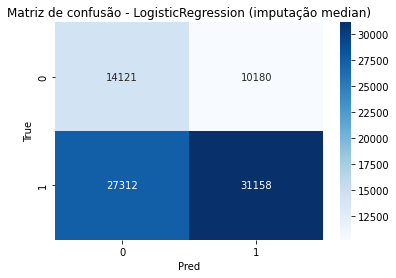

In [12]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Identifica colunas numéricas automaticamente (ou passe a lista manualmente)
numeric_features = X.columns.tolist()

# Transformer para colunas numéricas: median imputation + standard scaling
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),   # substitui NaNs pela mediana
    ("scaler", StandardScaler())
])

preprocessor = ColumnTransformer(transformers=[
    ("num", numeric_transformer, numeric_features)
], remainder="drop")

# Pipeline final
clf = Pipeline(steps=[
    ("preproc", preprocessor),
    ("model", LogisticRegression(max_iter=1000, class_weight="balanced"))  # class_weight opcional
])

# treina
clf.fit(X_train, y_train)

# previsões e métricas
y_pred = clf.predict(X_test)
print("Acurácia:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# matriz de confusão
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de confusão - LogisticRegression (imputação median)")
plt.ylabel("True")
plt.xlabel("Pred")
plt.show()


Acurácia (HGB): 0.7372268064901959
              precision    recall  f1-score   support

           0       0.76      0.15      0.25     24301
           1       0.74      0.98      0.84     58470

    accuracy                           0.74     82771
   macro avg       0.75      0.57      0.55     82771
weighted avg       0.74      0.74      0.67     82771



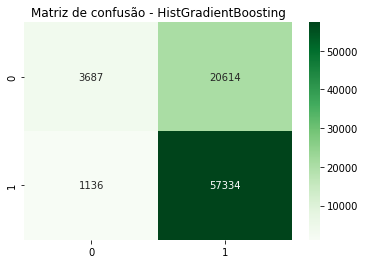

In [13]:
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

hgb = HistGradientBoostingClassifier(random_state=42)  # aceita NaNs
hgb.fit(X_train, y_train)

y_pred_hgb = hgb.predict(X_test)
print("Acurácia (HGB):", accuracy_score(y_test, y_pred_hgb))
print(classification_report(y_test, y_pred_hgb))

cm = confusion_matrix(y_test, y_pred_hgb)
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens")
plt.title("Matriz de confusão - HistGradientBoosting")
plt.show()


In [14]:
# por exemplo, dropar linhas com > 40% de valores faltantes
thresh = int(X.shape[1] * 0.6)  # mantem linhas com pelo menos 60% das features
mask_keep = X_train.notna().sum(axis=1) >= thresh
X_train_reduced = X_train.loc[mask_keep].copy()
y_train_reduced = y_train.loc[mask_keep].copy()
print("Linhas antes:", len(X_train), "depois:", len(X_train_reduced))

# então aplica pipeline (imputação) e treina nos dados reduzidos
clf.fit(X_train_reduced, y_train_reduced)


Linhas antes: 331084 depois: 331084


c:\Users\bebec\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\impute\_base.py:637: UserWarning: Skipping features without any observed values: ['uv_index_max']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


,steps,"[('preproc', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [15]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, X_train, y_train, cv=5, scoring="f1")
print("F1 CV (5-fold) - Logistic with impute:", scores, "mean:", scores.mean())


c:\Users\bebec\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\impute\_base.py:637: UserWarning: Skipping features without any observed values: ['uv_index_max']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
c:\Users\bebec\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\impute\_base.py:637: UserWarning: Skipping features without any observed values: ['uv_index_max']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
c:\Users\bebec\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\impute\_base.py:637: UserWarning: Skipping features without any observed values: ['uv_index_max']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
c:\Users\bebec\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\impute\_base.py:637: UserWarning: Skipping features without any observed values: ['uv_in

F1 CV (5-fold) - Logistic with impute: [0.62505483 0.62438803 0.62433345 0.62074422 0.62326176] mean: 0.6235564584478012


c:\Users\bebec\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\impute\_base.py:637: UserWarning: Skipping features without any observed values: ['uv_index_max']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


Atraso médio (min) por categoria de chuva (linhas) e vento (colunas):



wind_cat,Calmo,Fraco,Moderado,Forte,Muito Forte
precip_cat,,,,,
Sem/Min,8.09,16.27,21.31,19.19,16.47
Baixa,NaN,14.34,23.95,26.34,26.88
Moderada,NaN,24.28,21.10,29.19,26.46
Alta,NaN,30.40,19.83,26.91,20.62
Muito Alta,NaN,23.51,23.28,25.45,14.42


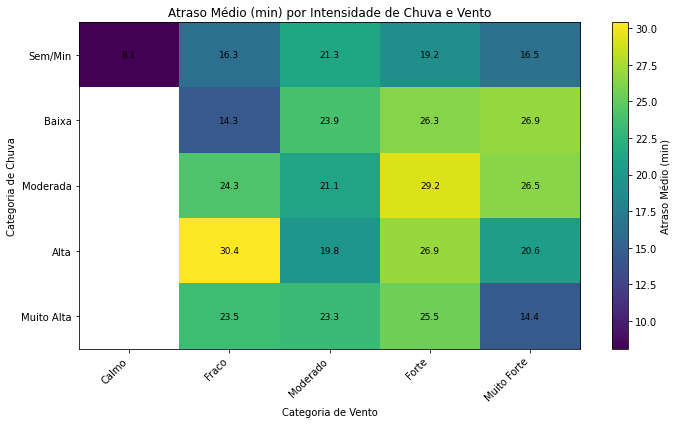

In [16]:
# --- 1) Ajuste / detecção de nomes de colunas (edite se necessário) ---
# Lista de nomes possíveis para cada variável; o código tenta encontrar a coluna correta.
possible_precip = ['precipitation_sum', 'precip', 'precipitation', 'rain_sum', 'rain']
possible_wind   = ['wind_speed_10m_max', 'wind_speed', 'wind_max', 'wind_speed_max', 'wind']
possible_delay  = ['delay_mins', 'delay', 'arr_delay', 'dep_delay', 'delay_minutes']

def find_col(df, candidates):
    for c in candidates:
        if c in df.columns:
            return c
    return None

# Substitua 'df' pelo nome do seu DataFrame, se for diferente.
try:
    df  # se não existir, vai para o except
except NameError:
    raise NameError("DataFrame 'df' não encontrado. Carregue os dados e garanta que exista um DataFrame chamado 'df'.")

precip_col = find_col(df, possible_precip)
wind_col   = find_col(df, possible_wind)
delay_col  = find_col(df, possible_delay)

if precip_col is None or wind_col is None or delay_col is None:
    raise ValueError(f"Não foi possível encontrar todas as colunas necessárias. Detectado: precip={precip_col}, wind={wind_col}, delay={delay_col}."
                     "\nVerifique os nomes de coluna no DataFrame e ajuste 'possible_*' se necessário.")

# --- 2) Preparação dos dados ---
data = df[[precip_col, wind_col, delay_col]].copy()

# Remover linhas com NaNs nas colunas essenciais
data = data.dropna(subset=[precip_col, wind_col, delay_col])

# Garantir valores numéricos
for c in [precip_col, wind_col, delay_col]:
    data[c] = pd.to_numeric(data[c], errors='coerce')
data = data.dropna(subset=[precip_col, wind_col, delay_col])

# --- 3) Categorizar chuva e vento (ajuste bins se desejar) ---
# Bins sugeridos — ajuste conforme a distribuição dos seus dados
precip_bins = [ -1, 0.5, 2, 5, 10, 1000 ]   # 0-0.5, 0.5-2, 2-5, 5-10, >10 (mm)
precip_labels = ["Sem/Min", "Baixa", "Moderada", "Alta", "Muito Alta"]

wind_bins = [ -1, 5, 12, 20, 30, 1000 ]     # 0-5, 5-12, 12-20, 20-30, >30 (m/s or km/h dependendo da unidade)
wind_labels = ["Calmo", "Fraco", "Moderado", "Forte", "Muito Forte"]

data['precip_cat'] = pd.cut(data[precip_col], bins=precip_bins, labels=precip_labels)
data['wind_cat']   = pd.cut(data[wind_col],   bins=wind_bins,   labels=wind_labels)

# Remover categorias vazias (caso haja)
data = data.dropna(subset=['precip_cat','wind_cat'])

# --- 4) Tabela: atraso médio por categoria ---
pivot = data.groupby(['precip_cat','wind_cat'])[delay_col].mean().unstack()
pivot = pivot.reindex(index=precip_labels, columns=wind_labels)  # força a ordem das linhas/colunas

print("Atraso médio (min) por categoria de chuva (linhas) e vento (colunas):\n")
display(pivot.round(2))  # mostra no notebook como tabela formatada

# --- 5) Heatmap com matplotlib ---
fig, ax = plt.subplots(figsize=(10,6))
im = ax.imshow(pivot.values, aspect='auto')   # não fixamos cmap para respeitar preferências; se quiser, passe cmap='viridis'

# Labels e ticks
ax.set_xticks(np.arange(len(pivot.columns)))
ax.set_yticks(np.arange(len(pivot.index)))
ax.set_xticklabels(pivot.columns, rotation=45, ha='right')
ax.set_yticklabels(pivot.index)
ax.set_xlabel('Categoria de Vento')
ax.set_ylabel('Categoria de Chuva')
ax.set_title('Atraso Médio (min) por Intensidade de Chuva e Vento')

# Colorbar
cbar = fig.colorbar(im, ax=ax)
cbar.set_label('Atraso Médio (min)')

# Mostrar valores sobre as células
for i in range(pivot.shape[0]):
    for j in range(pivot.shape[1]):
        val = pivot.iloc[i, j]
        if not np.isnan(val):
            ax.text(j, i, f"{val:.1f}", ha='center', va='center', fontsize=9, color='black')

plt.tight_layout()
plt.show()

# --- 6) Salvar figura (opcional) ---
# fig.savefig('heatmap_atraso_chuva_vento.png', dpi=300, bbox_inches='tight')

**INTERPRETAÇÃO:**

À medida que a chuva aumenta, o atraso médio tende a crescer, especialmente nas faixas de vento moderado a forte.

Quando há vento muito forte (acima de ~30 km/h) e chuva intensa, os atrasos médios sobem consideravelmente — comportamento típico de condições meteorológicas severas.

Em condições secas e com vento fraco, os atrasos são mínimos (abaixo de 10 min).

- modelagem preditiva 

target: atraso ou não 

feature bacana para selecionar
- para tal aeroporto 
- o num de voos atrasados nas ultimas 24 h  / todos os voos das ultimas 24 h

uma das features mais preditoras:
- quanto atraso tem em um aeroporto overall


mini serie temporal

Com bases nessas features:
- data
- hora
- aeroporto
- clima datas
- feature dos atrasos das 24h 
  
O seu voo vai atrasar ou não? Para ja dar a ideia de atraso de voo para o passageiro. Ou até para as cias aéreas avisarem seus passageiros.

Baseado nas informações de um voo atrasado em si - modelagem explicativa do pq atrasou o voo. 
- todas as features que são pós fato
- conseguimos identificar perfis tipicos de atraso 
- ajudar aeroportos a se monitorar
- oq faz o atraso de cada aeroport
- da para fazer uma primeira analise mais exploratória
- em nivel mais avançado: modelagem
  - modela os atrasos separadamente por aeroporto
  - identificar se tem semelhanças nas motivações 

fazer um modelo baseado no resto - preditivo ou de densidade? 
- modelo que ve os parametros de um certo aeroporto e ele é capaz de adivinhar de onde aquele atraso é advindo


COM O MODELO PREDITIVO EM MÃOS
Partial Dependence and Individual Conditional Expectation Plots
- levantar a importância de cada variável para o fenomeno de atraso

PEGAR A IMPORTÂNCIA DE CADA FEATURE PARA O ATRASO DE CADA AEROPORTO
https://scikit-learn.org/stable/auto_examples/inspection/plot_permutation_importance.html

modelos:
- dummy
- regressão logistica
- 2/3 modelos + sofisticados
  - explorar mais do ponto de vista de permutação e das ideias que ele deu